In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('/content/ocd_data.csv')
df.head()


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [3]:
print(df.dtypes)

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [5]:
df.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


In [6]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64


In [7]:
df = df.dropna()
df = df.drop_duplicates()

In [8]:
print(df.isnull().sum())

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64


In [9]:
df.shape

(925, 17)

In [10]:


# Drop null values
df_clean = df.dropna()

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# Drop irrelevant columns
df_clean = df_clean.drop(columns=['Patient ID', 'OCD Diagnosis Date'])

# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

df_clean.head()


,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,32,0,0,2,3,203,1,0,1,0,17,10,1,1,1
2,57,1,3,0,0,173,1,0,0,0,3,4,0,0,0
3,27,0,3,1,0,126,2,1,4,4,14,28,1,1,2
5,32,0,1,1,0,46,0,0,2,2,26,11,1,1,2
6,38,0,3,2,0,110,1,0,0,3,12,16,1,0,1


<h1></h1>

# Random Forest Classifier


In [11]:
# Define features (X) and target (y)
X = df_clean.drop(columns=['Medications'])
y = df_clean['Medications']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Train RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.31351351351351353

# DecisionTree

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialize  model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict data
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

dt_accuracy


0.31891891891891894

# AdaBoost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#  model accuracy
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.32


<h1>Plots for ocd data</h1>

In [13]:
ocd_df = pd.read_csv('/content/ocd_data.csv')
ocd_df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [14]:
ocd_df.columns

Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')

<Axes: >

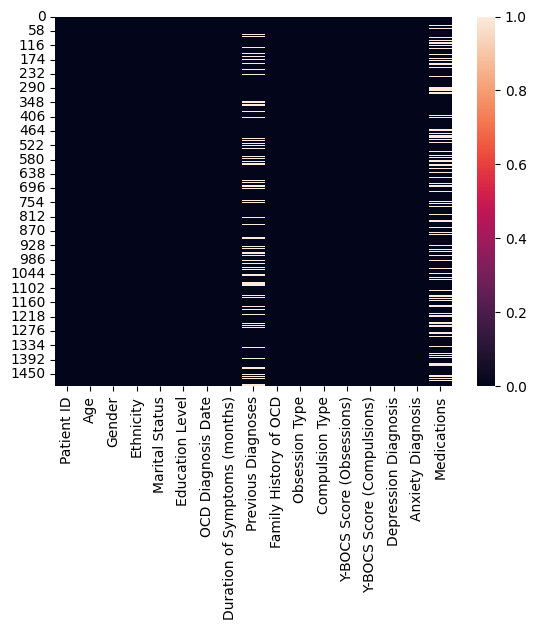

In [15]:
sns.heatmap(ocd_df.isnull())

<ipython-input-16-cf9b2499ce54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ocd_df['Gender'],palette="viridis")


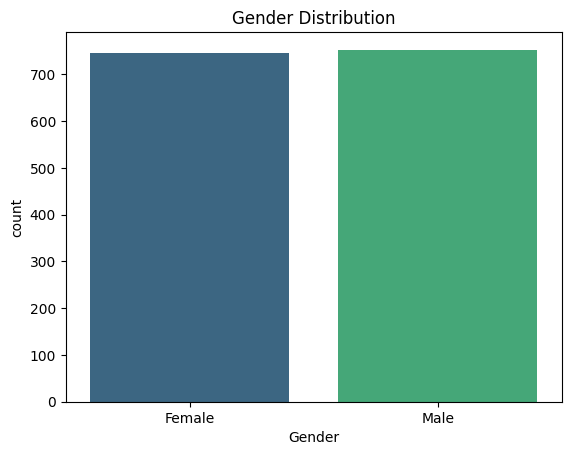

In [16]:
# plt.figure(dpi=250)
sns.countplot(x=ocd_df['Gender'],palette="viridis")
# plt.legend()
plt.title('Gender Distribution')
plt.show()

<ipython-input-17-3fa52b240577>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Ethnicity"],palette="viridis")


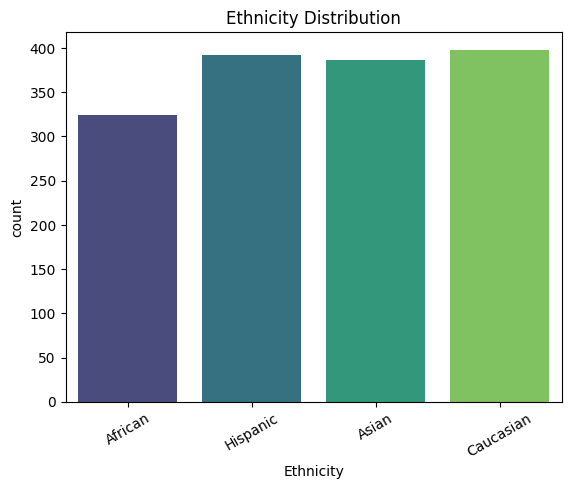

In [17]:
sns.countplot(x = ocd_df["Ethnicity"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('Ethnicity Distribution')
plt.show()

<ipython-input-18-d145300479b5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Marital Status"],palette="viridis")


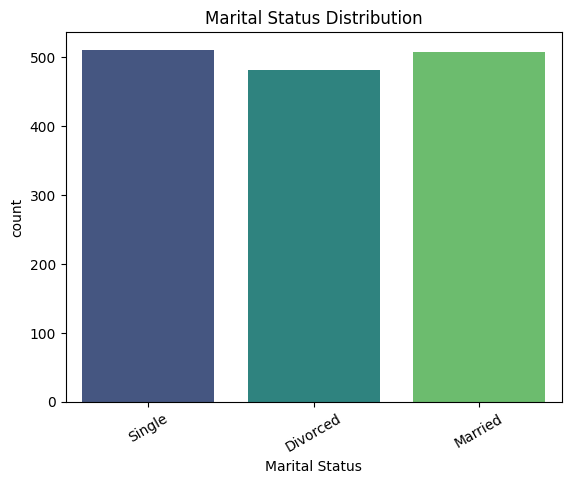

In [18]:
sns.countplot(x = ocd_df["Marital Status"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('Marital Status Distribution')
plt.show()

<ipython-input-19-92141b101f2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Education Level"],palette="viridis")


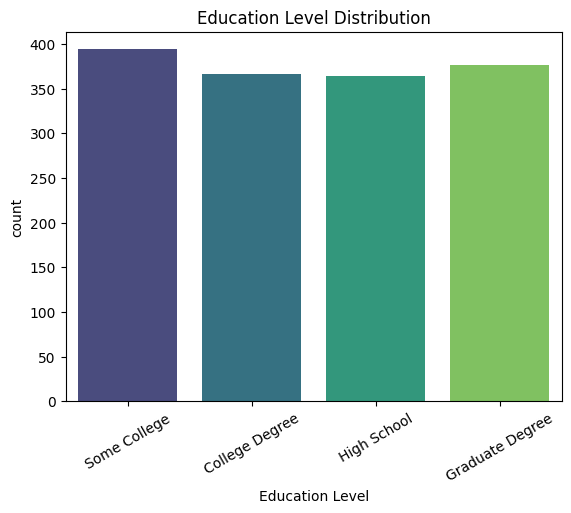

In [19]:
sns.countplot(x = ocd_df["Education Level"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('Education Level Distribution')
plt.show()

<ipython-input-20-b7d3e694d054>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["OCD Diagnosis Date"],palette="viridis")


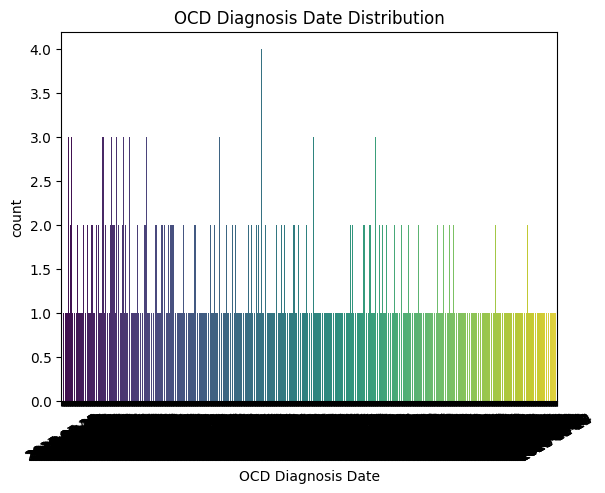

In [20]:
sns.countplot(x = ocd_df["OCD Diagnosis Date"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('OCD Diagnosis Date Distribution')
plt.show()

<ipython-input-21-84e60fe1752e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Previous Diagnoses"],palette="viridis")


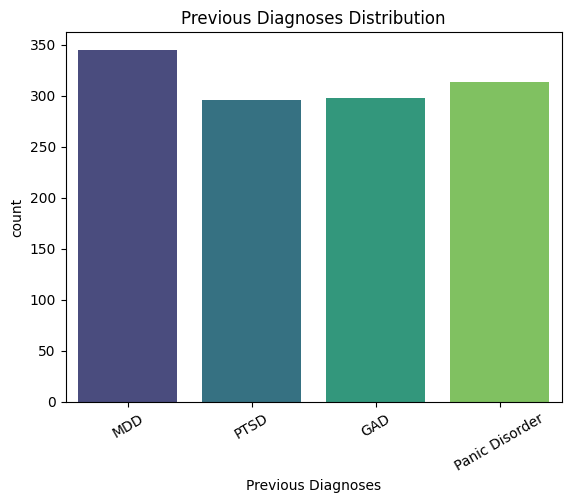

In [21]:
sns.countplot(x = ocd_df["Previous Diagnoses"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('Previous Diagnoses Distribution')
plt.show()

<ipython-input-22-1f680c85d5ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Family History of OCD"],palette="viridis")


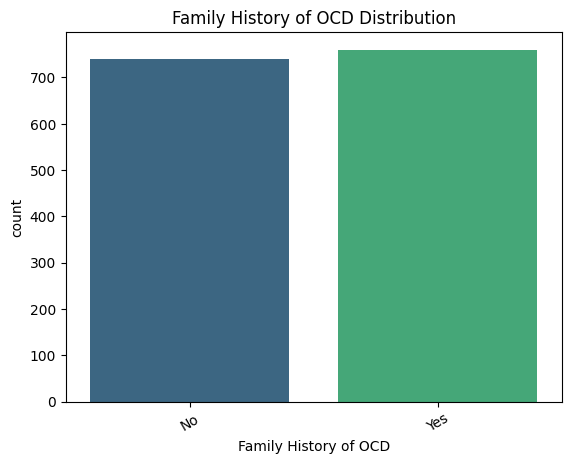

In [22]:
sns.countplot(x = ocd_df["Family History of OCD"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('Family History of OCD Distribution')
plt.show()

<ipython-input-23-c01c9d6b94e0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Obsession Type"],palette="viridis")


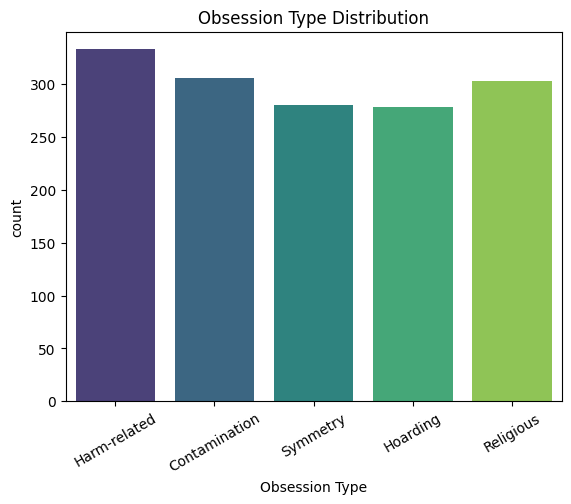

In [23]:
sns.countplot(x = ocd_df["Obsession Type"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('Obsession Type Distribution')
plt.show()

<ipython-input-24-64da7b626ed5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Compulsion Type"],palette="viridis")


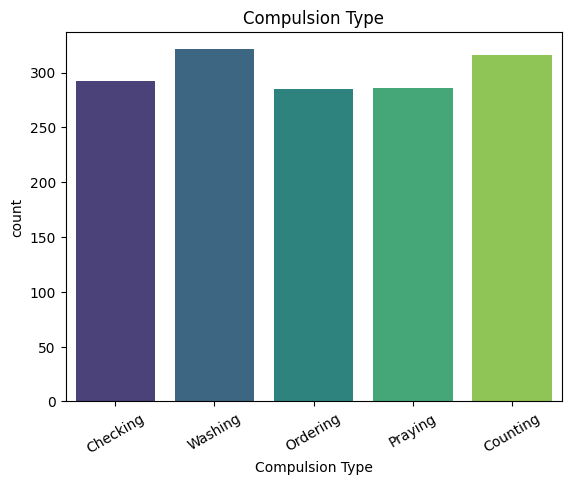

In [24]:
sns.countplot(x = ocd_df["Compulsion Type"],palette="viridis")
plt.xticks(rotation = 30)
plt.title("Compulsion Type")
plt.show()

<ipython-input-25-f29a1820918e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Depression Diagnosis"],palette="viridis")


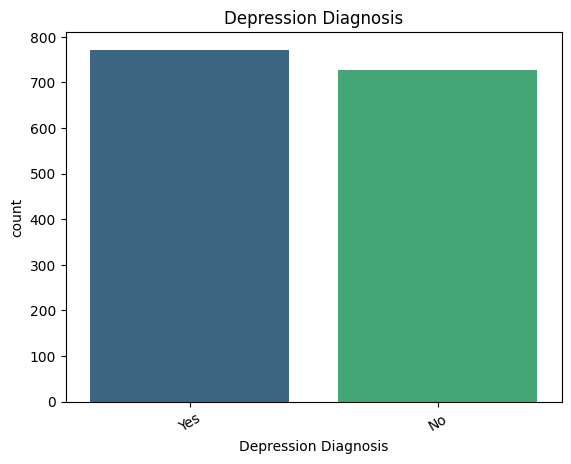

In [25]:
sns.countplot(x = ocd_df["Depression Diagnosis"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('Depression Diagnosis')
plt.show()

<ipython-input-26-2cb7f8dbf451>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Anxiety Diagnosis"],palette="viridis")


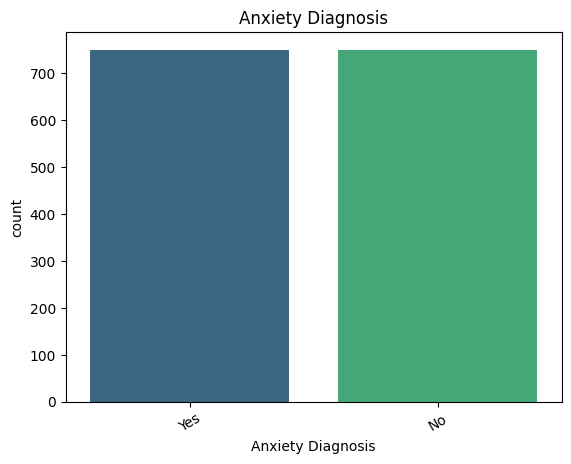

In [26]:
sns.countplot(x = ocd_df["Anxiety Diagnosis"],palette="viridis")
plt.xticks(rotation = 30)
plt.title("Anxiety Diagnosis")
plt.show()

<ipython-input-27-b15d7ffed790>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ocd_df["Medications"],palette="viridis")


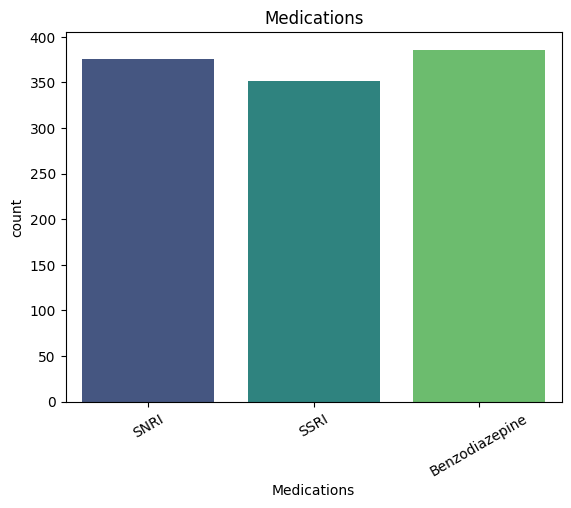

In [27]:
sns.countplot(x = ocd_df["Medications"],palette="viridis")
plt.xticks(rotation = 30)
plt.title('Medications')
plt.show()

In [47]:
ocd_df = ocd_df.dropna()
# ocd_df = ocd_df.drop(columns=['OCD Diagnosis Date'],axis=0)
# ocd_df = ocd_df.drop(columns=['OCD Diagnosis Date'],axis=1)
ocd_df["Gender"] = ocd_df["Gender"].replace({'Female':1,'Male':2})
ocd_df["Ethnicity"] = ocd_df["Ethnicity"].replace({'African':1,'Hispanic':2,'Asian':3,'Caucasian':4})
ocd_df['Previous Diagnoses'] = ocd_df['Previous Diagnoses'].replace({1:1,2:2,3:3,"Panic Disorder":4})
ocd_df["Marital Status"] = ocd_df["Marital Status"].replace({'Single':1,'Divorced':2,'Married':3})
ocd_df["Education Level"] = ocd_df["Education Level"].replace({'Some College':1,'College Degree':2,'High School':3,'Graduate Degree':4})
ocd_df["Family History of OCD"] = ocd_df["Family History of OCD"].replace({'No':1,'Yes':2})
ocd_df["Obsession Type"] = ocd_df["Obsession Type"].replace({'Harm-related':1,'Contamination':2,'Symmetry':3,'Hoarding':4,'Religious':5})
ocd_df["Compulsion Type"] = ocd_df["Compulsion Type"].replace({'Checking':1,'Washing':2,'Ordering':3,'Praying':4,'Counting':5})
ocd_df["Depression Diagnosis"] = ocd_df["Depression Diagnosis"].replace({'No':1,'Yes':2})
ocd_df["Anxiety Diagnosis"] = ocd_df["Anxiety Diagnosis"].replace({'No':1,'Yes':2})
ocd_df["Medications"] =ocd_df["Medications"].replace({'SNRI':0,'SSRI':1,'Benzodiazepine':2})

<ipython-input-47-fb8a7caf6f08>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ocd_df["Compulsion Type"] = ocd_df["Compulsion Type"].replace({'Checking':1,'Washing':2,'Ordering':3,'Praying':4,'Counting':5})
<ipython-input-47-fb8a7caf6f08>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ocd_df["Depression Diagnosis"] = ocd_df["Depression Diagnosis"].replace({'No':1,'Yes':2})
<ipython-input-47-fb8a7caf6f08>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

In [33]:
ocd_df.columns

Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')

In [48]:
ocd_df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,1,203,1,1,1,1,17,10,2,2,0
2,1188,57,2,2,2,2,173,1,1,2,1,3,4,1,1,2
3,6200,27,1,2,3,2,126,2,2,3,2,14,28,2,2,1
5,6946,32,1,3,3,2,46,3,1,4,3,26,11,2,2,1
6,9861,38,1,2,1,2,110,1,1,2,4,12,16,2,1,0


In [50]:
print("Skewness: %f" % ocd_df['Previous Diagnoses'].skew())
print("Kurtosis: %f" % ocd_df['Previous Diagnoses'].kurt())

Skewness: 0.061110
Kurtosis: -1.396185


In [59]:
train_feature = ocd_df.columns.drop('Medications').tolist()
train_feature

['Patient ID',
 'Age',
 'Gender',
 'Ethnicity',
 'Marital Status',
 'Education Level',
 'Duration of Symptoms (months)',
 'Previous Diagnoses',
 'Family History of OCD',
 'Obsession Type',
 'Compulsion Type',
 'Y-BOCS Score (Obsessions)',
 'Y-BOCS Score (Compulsions)',
 'Depression Diagnosis',
 'Anxiety Diagnosis']

In [62]:
ocd_df[train_feature].describe().T\
.style.bar(subset=['mean'])\
.background_gradient(subset=['std'], cmap='BuPu')\
.background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Patient ID,346.000000,5581.213873,2654.321378,1018.000000,3200.000000,5633.500000,7792.250000,9990.000000
Age,346.000000,48.219653,16.637247,19.000000,33.000000,49.000000,62.000000,75.000000
Gender,346.000000,1.494220,0.500691,1.000000,1.000000,1.000000,2.000000,2.000000
Ethnicity,346.000000,2.679191,1.136216,1.000000,2.000000,3.000000,4.000000,4.000000
Marital Status,346.000000,2.011561,0.812856,1.000000,1.000000,2.000000,3.000000,3.000000
Education Level,346.000000,2.543353,1.139349,1.000000,2.000000,3.000000,4.000000,4.000000
Duration of Symptoms (months),346.000000,127.445087,67.075762,6.000000,67.000000,131.000000,182.500000,238.000000
Previous Diagnoses,346.000000,2.436951,0.893421,1.000000,2.000000,2.439306,3.000000,4.000000
Family History of OCD,346.000000,1.500000,0.500724,1.000000,1.000000,1.500000,2.000000,2.000000
Obsession Type,346.000000,2.893064,1.502696,1.000000,1.000000,3.000000,4.000000,5.000000


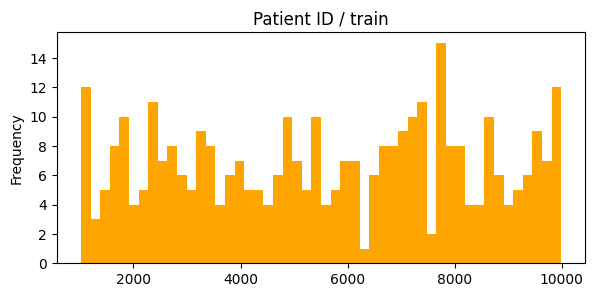

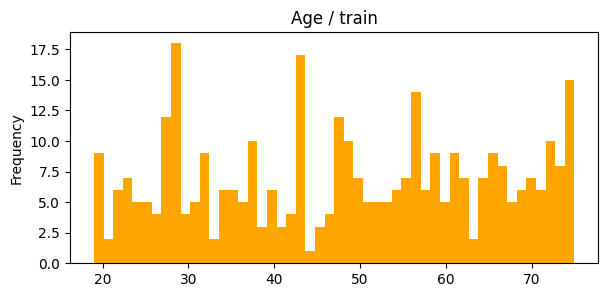

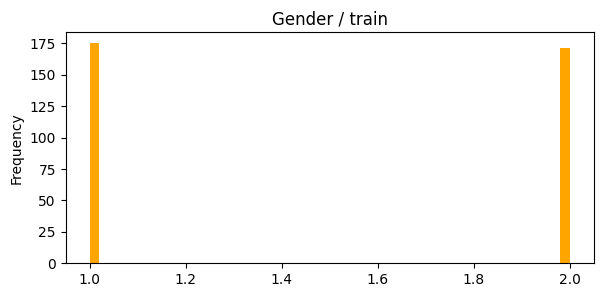

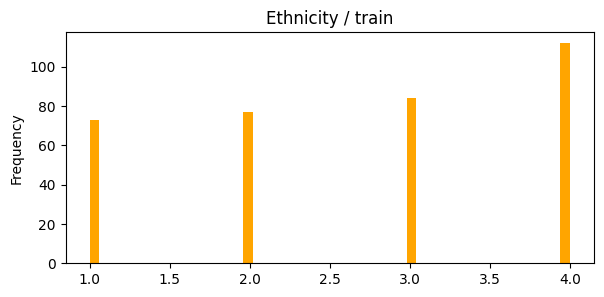

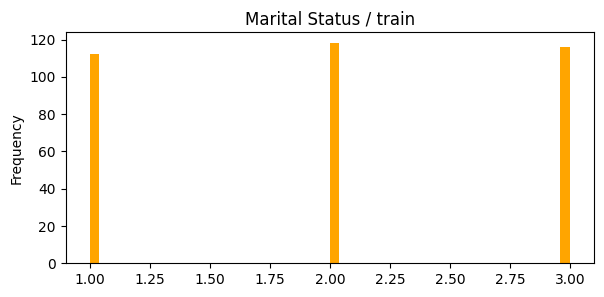

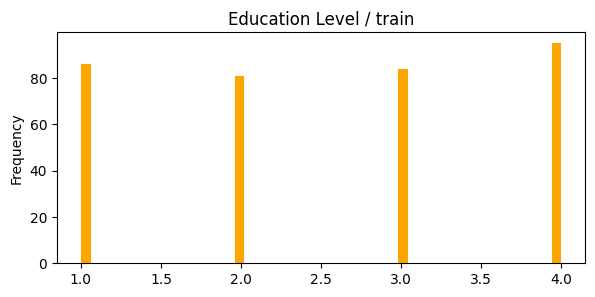

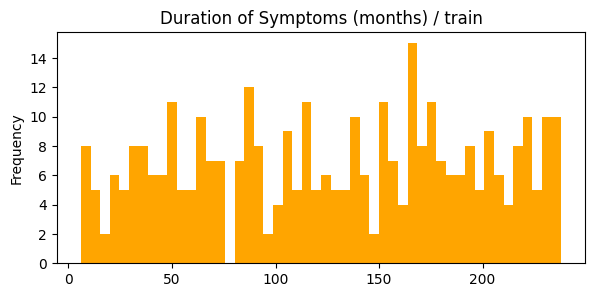

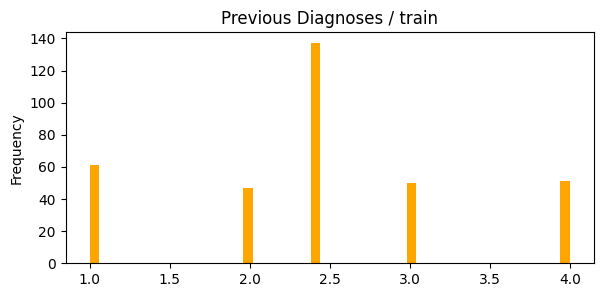

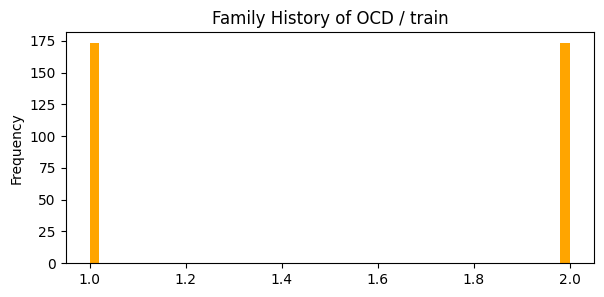

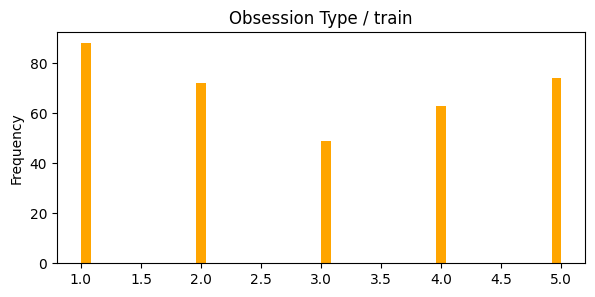

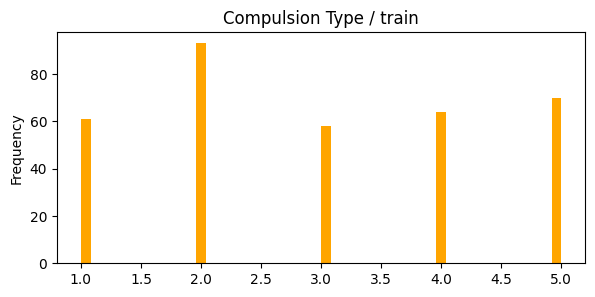

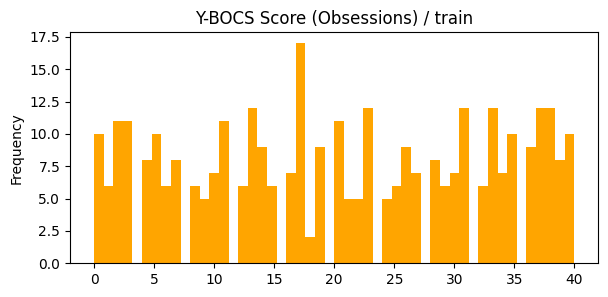

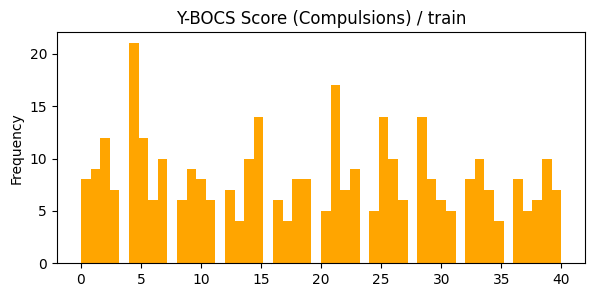

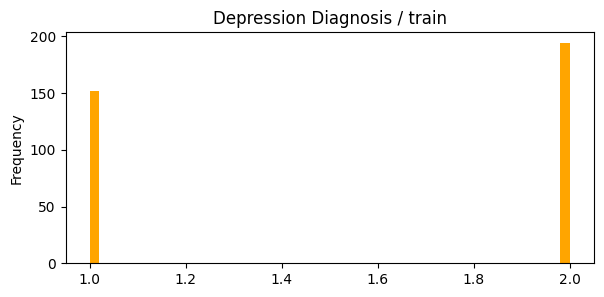

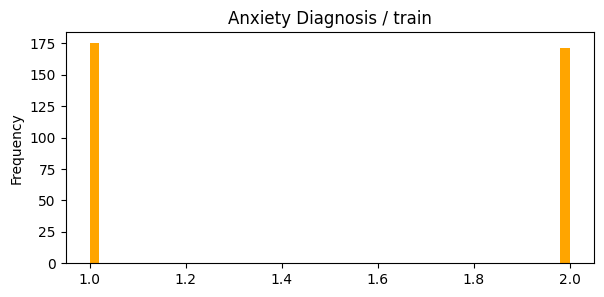

In [66]:
for i in train_feature:
  plt.figure(figsize=(15,3))
  ax1 = plt.subplot(1,2,1)
  ocd_df[i].plot(kind='hist', bins=50, color='orange')
  plt.title(i + ' / train')
  plt.show()

<Axes: >

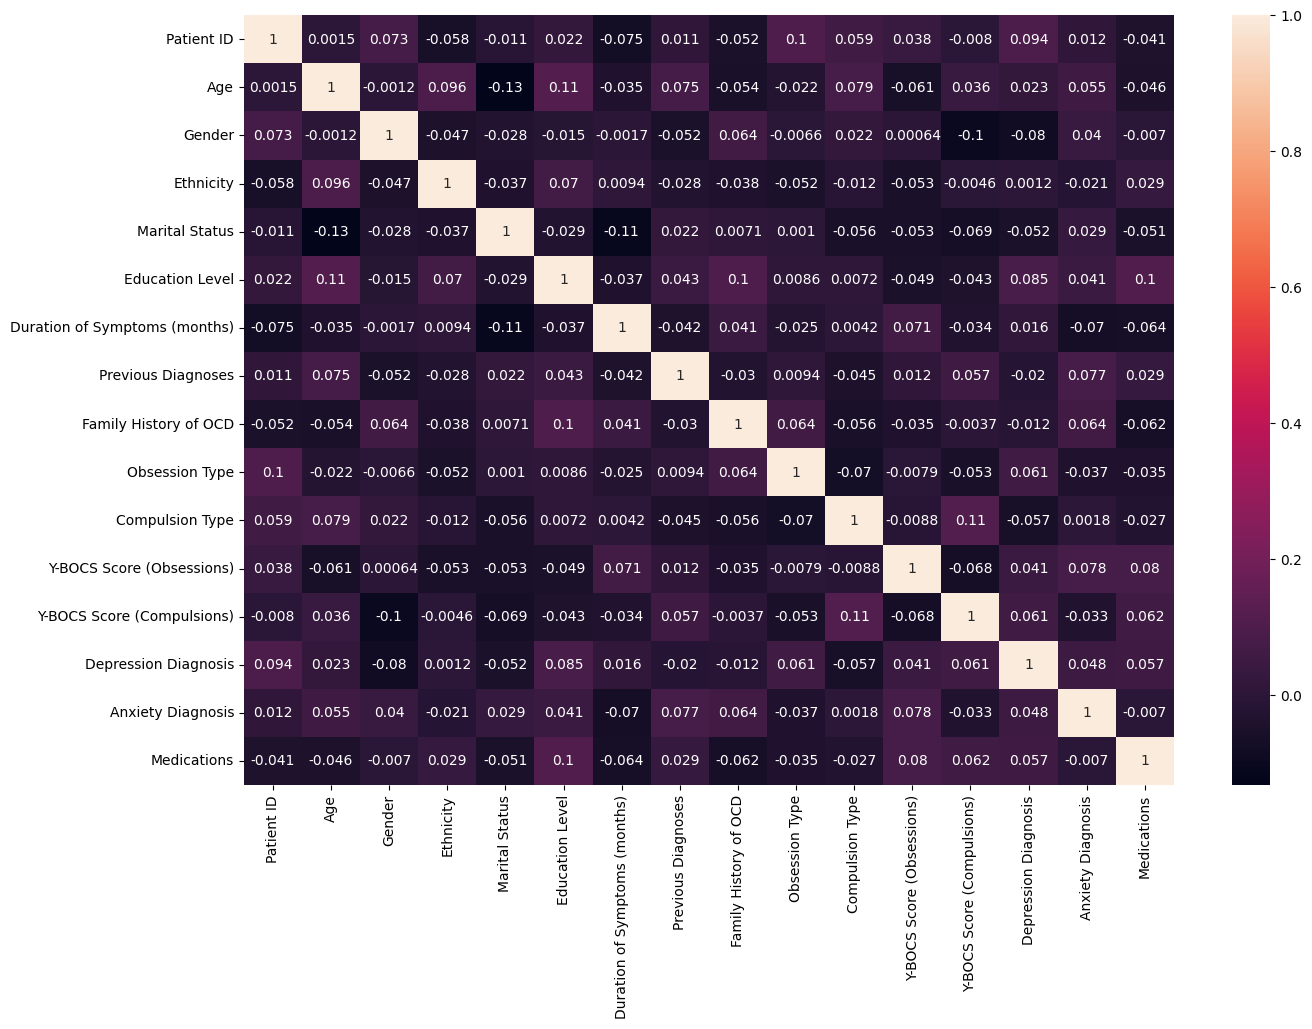

In [68]:
plt.figure(figsize=(15,10))

sns.heatmap(ocd_df.corr(),annot=True)

In [81]:
print("-"*10,"Skewness & Kurtosis",'-'*10,'\n')
for i in train_feature:
  print(f"{i} Skewness: %f" % ocd_df[i].skew())
  print(f"{i} Kurtosis: %f" % ocd_df[i].kurt())

---------- Skewness & Kurtosis ---------- 

Age Skewness: -0.054013
Age Kurtosis: -1.238738
Gender Skewness: 0.023224
Gender Kurtosis: -2.011119
Ethnicity Skewness: -0.216483
Ethnicity Kurtosis: -1.365380
Marital Status Skewness: -0.021205
Marital Status Kurtosis: -1.485950
Education Level Skewness: -0.054256
Education Level Kurtosis: -1.404899
Duration of Symptoms (months) Skewness: -0.078553
Duration of Symptoms (months) Kurtosis: -1.196899
Previous Diagnoses Skewness: 0.076729
Previous Diagnoses Kurtosis: -0.381931
Family History of OCD Skewness: 0.000000
Family History of OCD Kurtosis: -2.011662
Obsession Type Skewness: 0.111133
Obsession Type Kurtosis: -1.447834
Compulsion Type Skewness: 0.113548
Compulsion Type Kurtosis: -1.311789
Y-BOCS Score (Obsessions) Skewness: -0.033524
Y-BOCS Score (Obsessions) Kurtosis: -1.263142
Y-BOCS Score (Compulsions) Skewness: 0.076058
Y-BOCS Score (Compulsions) Kurtosis: -1.200251
Depression Diagnosis Skewness: -0.245649
Depression Diagnosis Kurtos